##### Here I am implementing a classification model for Telecom data.

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# reading dataset into a pandas dataframe
df=pd.read_csv('Churn-data.csv')
df1=df.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
# checking datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Here the total charges column is shown as object type(string) so converting that to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [8]:
# Converting all the column names to lower case and the columns having string values also to lower case and replace space with _

In [9]:
df.columns=df.columns.str.lower().str.replace(' ','_')
string_cols=list(df.dtypes[df.dtypes==object].index)

In [10]:
for i in string_cols:
    df[i]=df[i].str.lower().str.replace(' ','_')

In [11]:
# Converting the datatype of Churn vairable to integer
df.churn=(df.churn=='yes').astype(int)

In [12]:
# Checking the datatypes now
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


##### Dividing dataset into 3 sets: train,test and validation .I am using sklearn train_test_split fucction with a fixed random state by first using this on whole dataset and then again using on obtained dataset.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_T,y_test=train_test_split(df,test_size=0.20,random_state=1)
X_train,X_val=train_test_split(X_T,test_size=0.33,random_state=10)
y_train=X_train.churn.values
y_val=X_val.churn.values

In [15]:
# Removing churn variable from training dataset.
del X_train['churn']
del X_val['churn']

##### EDA

In [16]:
# Checking null values
X_T.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [17]:
# There are no null values thats a sign of releif.
# So now checking the distribution of churn
X_T.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [18]:
# There is a huge difference in 2 classes so its a case of imbalanced classification. Calculating churn rate as follows:
global_mean=X_T.churn.mean()
round(global_mean,2)

0.27

In [19]:
# As we are having categorical as well as numerical values we need to separate them out for better analysis.
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines', 'internetservice',
'onlinesecurity', 'onlinebackup', 'deviceprotection','techsupport', 'streamingtv', 'streamingmovies','contract', 'paperlessbilling',
 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [20]:
# Checking the number of unique values in categorical features
X_T[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

##### Feature Selection
##### Firstly checking which categorical features are important

##### Churn Rate : Looking for churn rate for each variable.I'll calculate the group churn rate and compare it to global churn rate. The group here is the collection of values of a particular type in a variable. If the difference between the rates is small, the value is not important when predicting churn because this group of customers is not really different from the rest of the customers. On the other hand, if the difference is not small, I will consider that group and variable.

##### For example: Taking gender variable:

In [21]:
female_mean=X_T[X_T.gender == 'female'].churn.mean()
print('gender==female:',round(female_mean, 2))
male_mean=X_T[X_T.gender == 'male'].churn.mean()
print('gender==male:',round(male_mean, 2))

gender==female: 0.28
gender==male: 0.26


##### The difference between the means of males and females is quite small so it will not to a good option to consider gender as a variable while making predictions.
##### In addition to looking at the difference between the group rate and the global rate,I'll look at the ratio between them. This ration is known as risk ratio , where risk refers to the risk of having the effect of churning

In [22]:
# Implementing thr risk ratio for all categorical variables:
from IPython.display import display
for i in categorical:
    df_=X_T.groupby(by=i).churn.agg(['mean'])
    df_['difference']=df_['mean']-global_mean
    df_['risk_ratio']=df_['mean']/global_mean
    display(df_)

,mean,difference,risk_ratio
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,difference,risk_ratio
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,difference,risk_ratio
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,difference,risk_ratio
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,difference,risk_ratio
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,difference,risk_ratio
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,difference,risk_ratio
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,difference,risk_ratio
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,difference,risk_ratio
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,difference,risk_ratio
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,difference,risk_ratio
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,difference,risk_ratio
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,difference,risk_ratio
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,difference,risk_ratio
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,difference,risk_ratio
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,difference,risk_ratio
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


##### By looking at the differences and the risks, I can identify the most informative features: the features that are helpful for detecting churn.it’s hard to use them to say what the most important feature is so I am using mutual information metric from sklearn which can measure the degree of dependency between a categorical variable and the target variable.if the mutual information between a categorical variable and the target is high, this categorical variable is useful for predicting the target. On the other hand, if the mutual information is low, the categorical variable and the target are independent,so the variable will not be useful for predictions.

In [23]:
from sklearn.metrics import mutual_info_score
def calculate_mut_info(a):
    return mutual_info_score(a,X_T.churn)
df_mi=X_T[categorical].apply(calculate_mut_info)
df_mi=df_mi.sort_values().to_frame(name='Mutual Info')
display(df_mi)

,Mutual Info
gender,0.000117
phoneservice,0.000229
multiplelines,0.000857
seniorcitizen,0.009410
partner,0.009968
dependents,0.012346
paperlessbilling,0.017589
streamingmovies,0.031581
streamingtv,0.031853
paymentmethod,0.043210


##### contract, onlinesecurity, and techsupport are among the most important features.Gender and phone service are least important so I will not use them for training model.

##### Feature Selection for numerical variables:

##### Mutual info can't be used between numerical variable and binary target variable so using Pearson correlation coefficient.

In [24]:
X_T[numerical].corrwith(X_T.churn).to_frame('P_correlation')

,P_correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [25]:
X_T.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


##### Feature Engineering: The features which I will use need to be converted to numbers as Machine learning algorithms don't understand any other types of values so I will use One Hot encoding to convert categorical values to numerical and I am using DictVectoizer for this.

In [26]:
# importing and making an object
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)

In [27]:
train_dic=X_train[numerical+categorical].to_dict(orient='records')
dv.fit(train_dic)

DictVectorizer(sparse=False)

##### The to_dict has an important parameter orient that can has multiple values but I chose records here which is list like and has format as : {['column'->value],['column'->value],['column'->value].....}

In [28]:
X_train_dict=dv.transform(train_dic)

In [29]:
X_train_dict.shape

(3774, 45)

##### Logistic Regression Model Training:

In [30]:
# importing from sklearn
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression()
model.fit(X_train_dict,y_train)

C:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Measure performance using validation set
val_dict=X_val[categorical + numerical].to_dict(orient='records')
X_val_dict=dv.transform(val_dict)

In [33]:
model.predict_proba(X_val_dict)

array([[0.98209632, 0.01790368],
       [0.97494926, 0.02505074],
       [0.35715346, 0.64284654],
       ...,
       [0.95307822, 0.04692178],
       [0.76631927, 0.23368073],
       [0.88231667, 0.11768333]])

##### The first column above shows that there is no churn and second shows there is churn so selecting second column only.

In [34]:
y_pred=model.predict_proba(X_val_dict)[:, 1]
y_pred

array([0.01790368, 0.02505074, 0.64284654, ..., 0.04692178, 0.23368073,
       0.11768333])

##### These are the soft predictions sthat a customer will churn so I will convert them into actual true and false predictions by using a thershold value of 0.5 which is generally taken.

In [35]:
churn=y_pred>0.5

I am using accuracy for measuring model performance : calculate the number of times the predictions match the actual value, I will use it for measuring the quality of the model.This quality measure is called accuracy.

In [36]:
(y_val==churn).mean()

0.7876344086021505

##### Although I used accuracy as a measure to evaluate the performance of model there are many more metrics also and 78.76% accuracy is good without performing much things. Maybe selecting some of features may increase accuracy and performance.

##### I will also evaluate model with different threshold values to find out if accuracy increases.

In [37]:
# Using sklearn accuracy_score
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 11)
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.275
0.10 0.605
0.20 0.705
0.30 0.748
0.40 0.768
0.50 0.788
0.60 0.784
0.70 0.760
0.80 0.729
0.90 0.725
1.00 0.725


Its not going beyond 78.8 which I obtained by randomly choosing threshold value to be 0.5

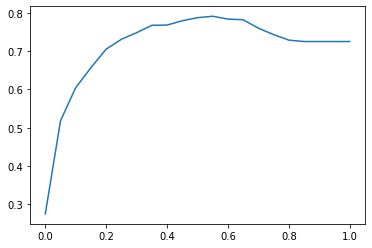

In [38]:
# plotting the accuracy
thresholds=np.linspace(0, 1, 21)
accuracies=[]
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
plt.plot(thresholds, accuracies)

##### Here the dataset is imbalanced as the number of customers who did not churned is much larger than who churned so it will not be a good idea to use Accuracy score here so I will be using Confusion Matrix and other related things.

In [39]:
# making the confusion matrix
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()
conf_matrix = np.array(
    [[true_negative, false_positive], 
     [false_negative, true_positive]]) 
conf_matrix

array([[1186,  163],
       [ 232,  279]])

In [40]:
# calculating percentage
conf_matrix/conf_matrix.sum()

array([[0.63763441, 0.08763441],
       [0.12473118, 0.15      ]])

##### True positive and True Negative are good values here positive means churn and negative means no churn. False Positve and False negative are bad values as we made wrong predictions.

##### Calculating Precision & Recall: The precision of a model tells us how many of the positive predictions turned out to be correct.
##### P=TP / (TP + FP)      
##### Recall is the fraction of correctly classified positive examples among all positive examples.
##### R=TP / (TP + FN)

In [41]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6312217194570136, 0.5459882583170255)

##### ROC Curve : Receiver Operating Characteristics : Shows how well a model can separate 2 classes positive and negative. 2 metrics TPR(true positive rate) & FPR(False positive rate) are required for calculating ROC.
False positive rate (FPR): the fraction of false positives among all negative

True positive rate (TPR): the fraction of true positives among all positive

FPR = FP / (FP + TN)

TPR = TP / (TP + FN)

In [42]:
# TPR AND FPR
scores = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [43]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [44]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,511,1349,0,0,1.000000,1.000000
10,0.1,480,704,31,645,0.939335,0.521868
20,0.2,420,457,91,892,0.821918,0.338769
30,0.3,384,341,127,1008,0.751468,0.252780
40,0.4,332,252,179,1097,0.649706,0.186805
50,0.5,279,163,232,1186,0.545988,0.120830
60,0.6,202,93,309,1256,0.395303,0.068940
70,0.7,90,25,421,1324,0.176125,0.018532
80,0.8,9,2,502,1347,0.017613,0.001483
90,0.9,0,0,511,1349,0.000000,0.000000


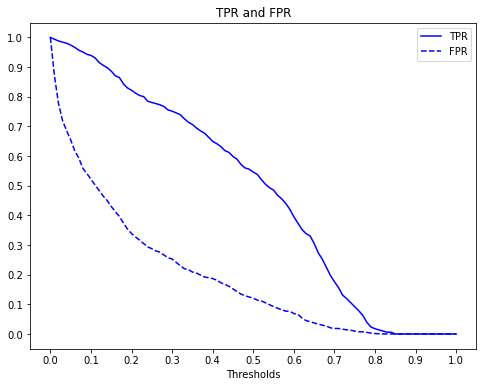

In [45]:
# plotting :
plt.figure(figsize=(8, 6))
plt.plot(df_scores.threshold,df_scores.tpr,color='blue',linestyle='solid',label='TPR')
plt.plot(df_scores.threshold,df_scores.fpr,color='blue',linestyle='dashed',label='FPR')
plt.legend()
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel('Thresholds')
plt.title('TPR and FPR')
plt.savefig('FPR_TPR.jpg')
plt.show()

No handles with labels found to put in legend.


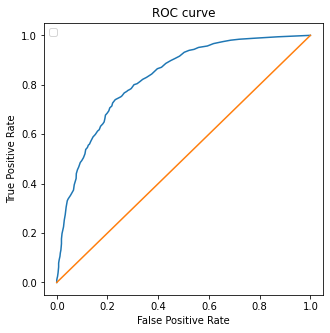

In [46]:
# ROC Curve : PLot FPR & TPR against each other
# Adding a straight line from (0, 0) to (1, 1) in the plot.
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0, 1], [0, 1])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig('ROC_Curve.jpg')
plt.show()

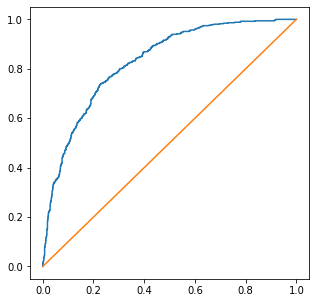

In [47]:
# USing the inbuilt sklearn metrics function for making this curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

##### AUC: Area under curve: When evaluating models using the ROC curve, they should be as close to the ideal spot(top left) and as far from the random baseline or straight line as possible. This is quantified by measuring area under ROC curve.Its called AUC.AUC of 0.9 is a good model; 0.8 is okay, 0.7 is not very performant, and 0.6 is poor performance

In [48]:
# Calculating AUC using sklearn
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.827699433805428

In [49]:
# If only AUC need to be calculated without ROC:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8280454174216169

##### AUC has a nice probabilistic interpretation: it tells what the probability is that a randomly selected positive example will have a score higher than a randomly selected negative example.

In [50]:
# Interpreting AUC by picking a random negative and positive value.
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]
np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.8338

##### Doing K-FOld Cross Validation:

##### As I need to run the same code again so making a function for training and predicting for ease.

In [51]:
def train(df, y):
    cat=df[categorical + numerical].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)
    dv.fit(cat)
    X=dv.transform(cat)
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    return dv, model

In [52]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [53]:
# importing kFOld from sklearn
from sklearn.model_selection import KFold

In [54]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [55]:
# Applying kfold on dataset
aucs = []
for i,j in kfold.split(X_T):
    df_train =X_T.iloc[i]
    y_train = df_train.churn.values
    df_val = X_T.iloc[j]
    y_val = df_val.churn.values
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [56]:
# aranging auc scores in np array
np.array(aucs).round(2)

array([0.85, 0.84, 0.86, 0.83, 0.82, 0.84, 0.84, 0.82, 0.85, 0.86])

In [57]:
# Mean and standard deviation of AUC scores:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


In [58]:
# Finding best parameters for the model Logistic Regression -C - regularization parameter
# Rewriting train function:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)
    return dv, model

##### find the best parameter C. The idea is simple:
##### Loop over different values of C.
##### For each C, run cross-validation

In [59]:
nfolds=5
kfold=KFold(n_splits=nfolds, shuffle=True, random_state=1)
for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs=[]
    for i,j in kfold.split(X_T):
        df_train = X_T.iloc[i]
        df_val = X_T.iloc[j]
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.007
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


##### Using the model

In [60]:
customer = {
    'customerid': '1123-akof',
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 36,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 500,
    'totalcharges': 3320.75
}
df = pd.DataFrame([customer])
y_pred = predict(df, dv, model)
y_pred[0]

0.3772666354851209

##### The above customer has around 37.7 % chances of leaving the service.

##### Deployment: It is done to use the model even in different environments outside the jupyter notebook. I am using pickle to save the model and then load it and use it. joblib can also be used for this purpose.

In [61]:
import pickle 
# Saving the model will not be enough. I need to save the dictvectorizer also.
with open('churn-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

##### To be done:

##### Serving the model: model is deployed as a web service in this step. I will be using Streamlit for this .Many other franeworks are also available for this purpose like: django,flask but Streamlit is simplest & fast.